### 1. Loading and Exploring the Dataset

#### 1.1 Loading the Dataset

In [1]:
### Your solution here
import pandas as pd
import numpy as np

df = pd.read_csv('../data/processed/insurance.csv')
#print(df) 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1.2 Exploratory Data Analysis (Task 4)
### *Exploring the Dataset*

##### 1.2.1 Exploring the *Shape* of the Dataset

In [2]:
print(df.shape)

(1338, 7)


##### 1.2.2 Exploring the *info* of the Dataset

In [3]:
print(df.info)

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


##### 1.2.3 Having a look at statistical summary of the *numerical* data.

In [4]:
df.describe(exclude=np.object).T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


##### 1.2.4 Having a look at statistical summary of the *categorical* data.

In [5]:
df.describe(exclude=np.number).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


##### 1.2.5 Having a look at statistical summary of the Dataset with *pandas_profiling*.

In [157]:
import pandas_profiling as pdp

profile = pdp.ProfileReport(df)
profile
#profile.to_file(output_file='Dataset_Profile.html') #saving the profile into the Dataset_Profile.html

##### 1.2.6 Exploring if there is any *Null* value in the Dataset

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## My observations after the initial exploration and Profiling of the Dataset:
- This dataset contains the Medical Insurance Cost/charge of a small sample of USA population.
- In the raw dataset there are 1338 rows and 7 columns where 1 row is duplicate but there are no missing values.
- Among 7 columns, 4 are numeric and 3 are categorical.
- The values of the column ***age*** is in the range 18 to 64(mean: 39.21).
- There are 662(49.5%) female and 676(50.5%) male, that suggests the dataset is quite a balanced one from the perspective of gender.
- The ***bmi*** column contains values from 15.96 to 53.13. The bmi less than 18.5 is considered as under weight and greater than 30 is obese. So there might be some persons with extreme weight issue.
- From the ditribution of ***children*** column generated by the Pandas_Profiling shows that, **42.9%**(574) of the entire sample has no children. 24.1%(324) has 1 childeren, 17.9%(240) has 2, 11.7%(157) has 3, 1.9%(25) has 4 and 1.3%(18) has 5 children.
- 79.5%(1064) of the sample population is Non-Smoker while 20.5%(274) is Smoker.
- ***region*** column shows a fair distribution of population throughout the four regions.
- The minimum insurance cost indicated in this dataset is \\$1121.87 and maximum is \\$63770.43 (mean: \\$13270.42).

#### Correlations:
- Through Pandas_Profiling, Phi_K correlation among the columns clearly shows that, there are very **strong correlation between insurance cost and smoking habit**, moderate high correlation between age and insurance cost and a medium level correrelation has been found between bmi and cost/charge.
- No significant correlation has been found for insurance cost with any other columns.

#### 2. Data Wrangling (Cleaning and processing the Dataset)

#### 2.1 Renaming the columns to the standard naming format.

In [5]:
df = df.rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','smoker':'Smoker','region':'Region','charges':'Charges'})
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 2.2 Dropping Null Values

In [11]:
# Although The Dataset doesn't have any null values, but doing it as a part for the further method chaining.
df = df.dropna()

#### 2.3 Resetting the index.

In [12]:
df = df.reset_index()
df.head()

,index,Age,Sex,BMI,Children,Smoker,Region,Charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


#### 2.4 Deleting the newly added *index* column.

In [13]:
df = df.drop(['index'], axis=1)
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 2.5 Dropping Duplicate rows

In [14]:
df = df.drop_duplicates()

#### 2.6 Sorting the Dataset based on the *Age*.

In [15]:
df.sort_values(by = ['Age'])
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 2.7 Adding a new column named ***Risk*** based on BMI values. The values in this column indicates the health risk status: Under Weight, Healthy Weight, Over Weight and Obesity.

In [12]:
conditions = [
    (df['BMI'] < 18.5),
    (df['BMI'] >= 18.5) & (df['BMI'] < 25),
    (df['BMI'] >= 25.0) & (df['BMI'] < 30),
    (df['BMI'] >= 30)
    ]

values = ['Under Weight', 'Healthy Weight', 'Over Weight', 'Obese']

df['Risk'] = np.select(conditions, values)
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges,Risk
0,19,female,27.900,0,yes,southwest,16884.92400,Over Weight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Healthy Weight
4,32,male,28.880,0,no,northwest,3866.85520,Over Weight


##### 2.7.1 Just Testing if the for types of values have been added to the Risk Column

In [49]:
print(df.Risk.unique())
df.head()

['Obese' 'Healthy Weight' 'Over Weight' 'Under Weight']


,Age,Sex,BMI,Children,Smoker,Region,Charges,Risk
866,18,male,37.29,0,no,southeast,1141.4451,Obese
911,18,male,31.73,0,yes,northeast,33732.6867,Obese
1248,18,female,39.82,0,no,southeast,1633.9618,Obese
781,18,male,41.14,0,no,southeast,1146.7966,Obese
600,18,female,39.16,0,no,southeast,1633.0444,Obese


## 3. Method Chaining (Task 3)

#### Testing the method chaining

In [42]:

df = (pd.read_csv('../data/processed/insurance.csv')
      .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','smoker':'Smoker','region':'Region','charges':'Charges'})
      .dropna()
      .reset_index()
      .drop(['index'], axis=1)
      .drop_duplicates()
      .sort_values(by = ['Age'])
      .assign(Risk= lambda x: x['BMI'].apply(lambda y: "Under Weight" if y < 18.5 else ("Healthy Weight" if 18.5 <= y < 25 else ("Over Weight" if 25 <= y < 30 else "Obese"))))
)

df.head()


,Age,Sex,BMI,Children,Smoker,Region,Charges,Risk
866,18,male,37.29,0,no,southeast,1141.4451,Obese
911,18,male,31.73,0,yes,northeast,33732.6867,Obese
1248,18,female,39.82,0,no,southeast,1633.9618,Obese
781,18,male,41.14,0,no,southeast,1146.7966,Obese
600,18,female,39.16,0,no,southeast,1633.0444,Obese


### Setting The method chaining as python module

- Inside the ***analysis*** directory, a new directory called ***scripts*** has been created.
- A file named ***project_functions.py*** has been created under the directory ***scripts***.
- A function named ***load_and_process*** has been written into the project_functions.py file which takes the dataset path as argument, does the data cleaning and preprocessing through method chaining and return the processed dataframe.
- All the neccessary module (pandas, numpy, etc…) has been imported too.


### Importing *project_functions* as a python module from *scripts* to access the *load_and_process* function.

In [46]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts import project_functions

df = project_functions.load_and_process('../data/processed/insurance.csv')
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges,Risk
866,18,male,37.29,0,no,southeast,1141.4451,Obese
911,18,male,31.73,0,yes,northeast,33732.6867,Obese
1248,18,female,39.82,0,no,southeast,1633.9618,Obese
781,18,male,41.14,0,no,southeast,1146.7966,Obese
600,18,female,39.16,0,no,southeast,1633.0444,Obese


## 4. Data Analysis (Task 5)

### Setting the Visualization Environment.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your solution here

sns.set_theme(style="ticks",
              font_scale=1.3, 
             )
plt.rc("axes.spines", top=False, right=False)

#### 4.1 Finding if there is any relation between Smoking habit, BMI and Charges.

<AxesSubplot:xlabel='BMI', ylabel='Charges'>

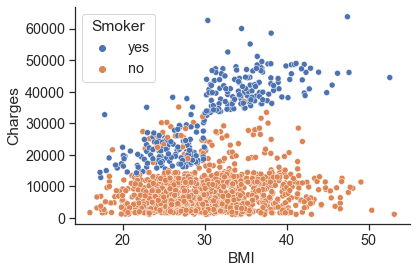

In [11]:
sns.scatterplot(x="BMI", y="Charges", hue="Smoker", data=df)

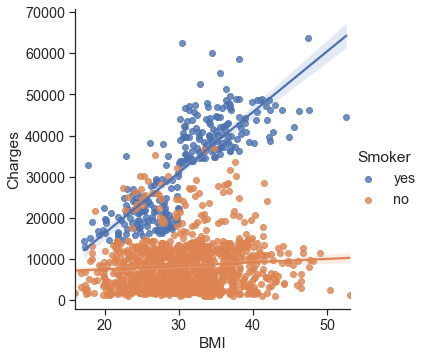

In [10]:
sns.lmplot(x="BMI", y="Charges", hue="Smoker", data=df)

##### 4.1.1 Demonstrate the distribution of Age over Risk based on the Gender.

<AxesSubplot:xlabel='Age', ylabel='Risk'>

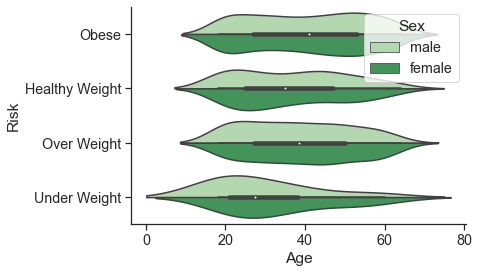

In [170]:
sns.violinplot(data= df,
              y= 'Risk',
              x= 'Age',
              hue = 'Sex',
              palette = 'Greens',
              split=True)

#### 4.2 Finding if there is any relation between Smoking habit, Age and Charges.

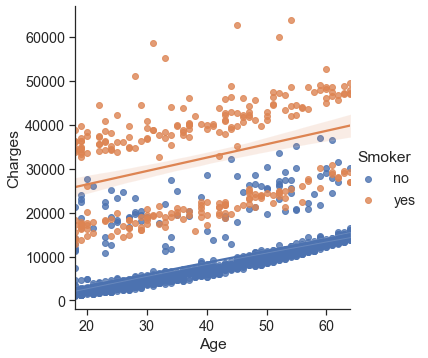

In [171]:
sns.lmplot(x="Age", y="Charges", hue="Smoker", data=df)

##### 4.2.1 The distribution of Smoking habit over Age based on Gender.

<AxesSubplot:xlabel='Age', ylabel='Smoker'>

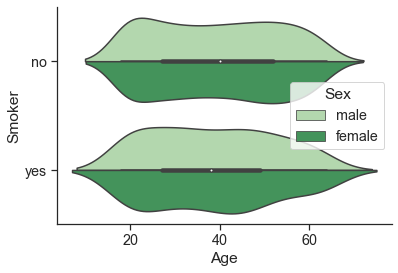

In [172]:
sns.violinplot(data= df,
              y= 'Smoker',
              x= 'Age',
              hue = 'Sex',
              palette = 'Greens',
              split=True)

#### 4.3 The Distribution of charges for smokers vs. non-smoker.

Text(0.5, 1.0, 'Distribution of charges for smokers vs. non-smokers')

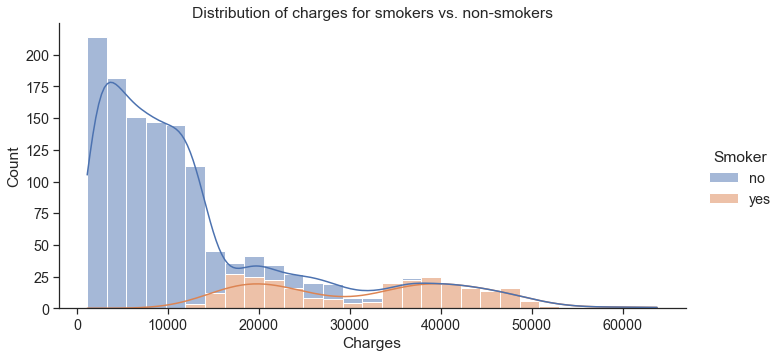

In [174]:
sns.displot(data = df, x = "Charges", hue="Smoker",aspect=2, multiple="stack", kde = True)
plt.title("Distribution of charges for smokers vs. non-smokers")


#### 4.4 Finding if the number of Children has any impact on Charges.

<AxesSubplot:title={'center':'Relation between Children and Charges'}, xlabel='Children', ylabel='Charges'>

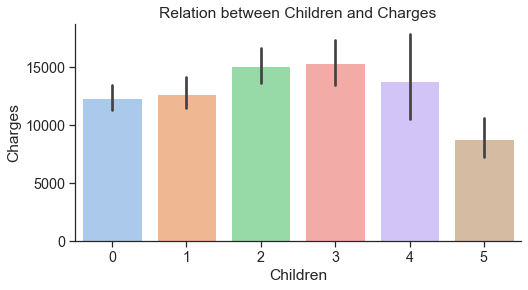

In [175]:
plt.figure(figsize=(8,4))
plt.title('Relation between Children and Charges')
sns.barplot(x=df['Children'], y=df['Charges'],palette = 'pastel')

#### 4.5 Finding if there is any relationship between having children and being healthy.

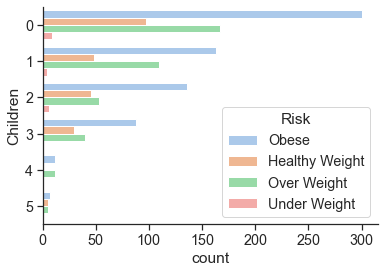

In [176]:
sns.countplot(data=df, y ="Children", palette = 'pastel', hue = 'Risk')
plt.legend(labels=["Obese","Healthy Weight","Over Weight","Under Weight"], title="Risk", loc= 4)

In [177]:
print('Total number of Medical Insurance Holders who has Obese:',np.sum([(df['Risk'] == 'Obese')]))
print('Total number of Medical Insurance Holders with Obese who has children: ',np.sum([(df['Risk'] == 'Obese') & (df['Children'] != 0)]))
print('Total number of Medical Insurance Holders with Obese who has no children',np.sum([(df['Risk'] == 'Obese') & (df['Children'] == 0)]))

Total number of Medical Insurance Holders who has Obese: 706
Total number of Medical Insurance Holders with Obese who has children:  406
Total number of Medical Insurance Holders with Obese who has no children 300


In [178]:
print('Total number of Medical Insurance Holders who has Healthy Weight: ',np.sum([(df['Risk'] == 'Healthy Weight')]))
print('Total number of Medical Insurance Holders with Healthy Weight who has children: ',np.sum([(df['Risk'] == 'Healthy Weight') & (df['Children'] != 0)]))
print('Total number of Medical Insurance Holders with Healthy Weight who has no children',np.sum([(df['Risk'] == 'Healthy Weight') & (df['Children'] == 0)]))

Total number of Medical Insurance Holders who has Healthy Weight:  225
Total number of Medical Insurance Holders with Healthy Weight who has children:  128
Total number of Medical Insurance Holders with Healthy Weight who has no children 97


#### 4.6 Finding How many male and female are smoker.

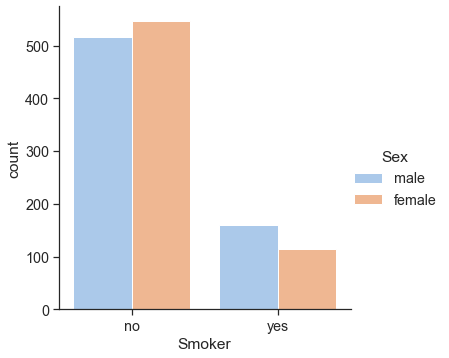

In [179]:
sns.catplot(x="Smoker", kind="count",hue = 'Sex', palette="pastel", data=df)

In [180]:
print('Total Smoker: ',np.sum([(df['Smoker'] == 'yes')]))
print('Total Non-Smoker: ',np.sum([(df['Smoker'] == 'no')]))
print('Total male with smoking habit: ',np.sum([(df['Smoker'] == 'yes') & (df['Sex'] == "male")]))
print('Total female with smoking habit: ',np.sum([(df['Smoker'] == 'yes') & (df['Sex'] == "female")]))
print('Total male with non-smoking habit: ',np.sum([(df['Smoker'] == 'no') & (df['Sex'] == "male")]))
print('Total female with non-smoking habit: ',np.sum([(df['Smoker'] == 'no') & (df['Sex'] == "female")]))

Total Smoker:  274
Total Non-Smoker:  1063
Total male with smoking habit:  159
Total female with smoking habit:  115
Total male with non-smoking habit:  516
Total female with non-smoking habit:  547


#### 4.7 Region-wise Charging 

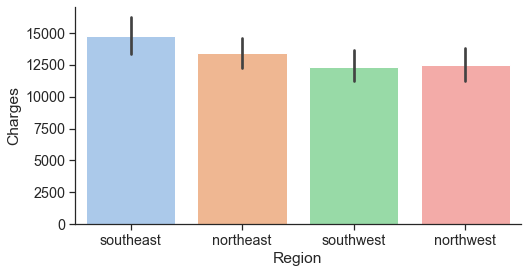

In [181]:
f, ax = plt.subplots(1,1, figsize=(8,4))
ax = sns.barplot(x = 'Region', y = 'Charges', data=df, palette='pastel')

In [182]:
dfse = df[(df['Region'] == 'southeast')]
max_cost1 = dfse['Charges'].max()
print('Maximum charges of SouthEast: ',max_cost1)

dfne = df[(df['Region'] == 'northeast')]
max_cost2 = dfne['Charges'].max()
print('Maximum charges of NorthEast: ',max_cost2)

dfsw = df[(df['Region'] == 'southwest')]
max_cost3 = dfsw['Charges'].max()
print('Maximum charges of SouthWest: ',max_cost3)

dfnw = df[(df['Region'] == 'northwest')]
max_cost4 = dfnw['Charges'].max()
print('Maximum charges of NorthWest: ',max_cost4)

Maximum charges of SouthEast:  63770.42801
Maximum charges of NorthEast:  58571.07448
Maximum charges of SouthWest:  52590.82939
Maximum charges of NorthWest:  60021.39897


#### 4.8 Finding relationship among Charges, Region and Gender.

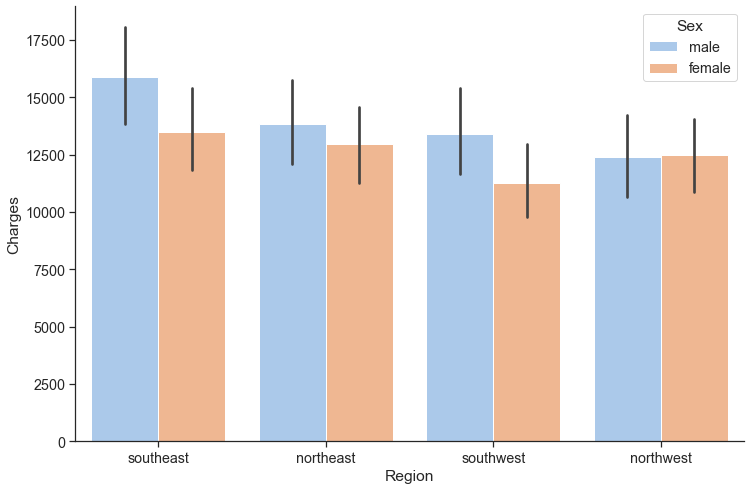

In [184]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Region', y='Charges', hue='Sex', data=df, palette='pastel')

#### 4.9 Finding relationship among Charges, Region and Smoking Habit.

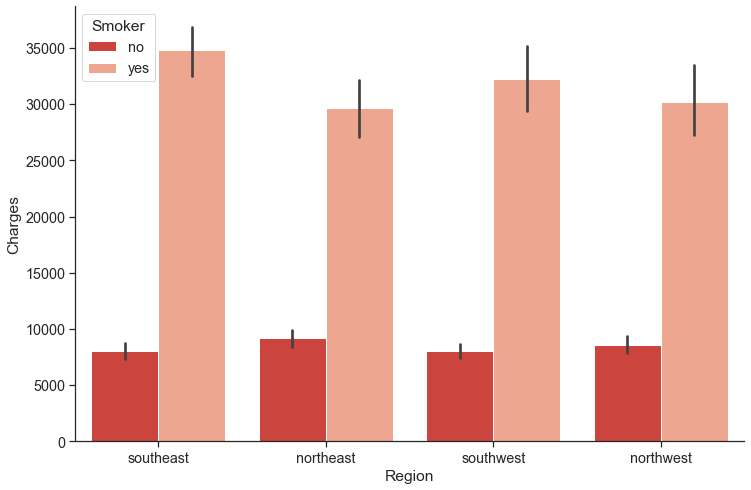

In [185]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'Region', y = 'Charges', hue='Smoker', data=df, palette='Reds_r')

In [186]:
print('Total Smoker in SouthEast region : ',np.sum([(df['Region'] == 'southeast') & (df['Smoker'] == 'yes')]))
print('Total Non-Smoker in SouthEast region : ',np.sum([(df['Region'] == 'southeast') & (df['Smoker'] == 'no')]))
print('Total Smoker in NorthEast region : ',np.sum([(df['Region'] == 'northeast') & (df['Smoker'] == 'yes')]))
print('Total Non-Smoker in NorthEast region : ',np.sum([(df['Region'] == 'northeast') & (df['Smoker'] == 'no')]))
print('Total Smoker in SouthWest region : ',np.sum([(df['Region'] == 'southwest') & (df['Smoker'] == 'yes')]))
print('Total Non-Smoker in SouthWest region : ',np.sum([(df['Region'] == 'southwest') & (df['Smoker'] == 'no')]))
print('Total Smoker in NorthWest region : ',np.sum([(df['Region'] == 'northwest') & (df['Smoker'] == 'yes')]))
print('Total Non-Smoker in NorthWest region : ',np.sum([(df['Region'] == 'northwest') & (df['Smoker'] == 'no')]))

Total Smoker in SouthEast region :  91
Total Non-Smoker in SouthEast region :  273
Total Smoker in NorthEast region :  67
Total Non-Smoker in NorthEast region :  257
Total Smoker in SouthWest region :  58
Total Non-Smoker in SouthWest region :  267
Total Smoker in NorthWest region :  58
Total Non-Smoker in NorthWest region :  266


#### 4.10 Distribution of medical insurance holder people over the four Regions.

<AxesSubplot:xlabel='count', ylabel='Region'>

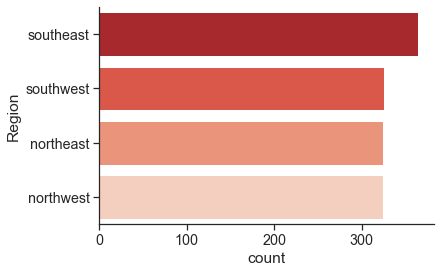

In [187]:
sns.countplot(data=df, y ="Region", palette = 'Reds_r', order = df["Region"].value_counts().index)

In [188]:
print('Total Medical Insurance holder in SouthEast region : ',np.sum([(df['Region'] == 'southeast')]))
print('Total Medical Insurance holder in NorthEast region : ',np.sum([(df['Region'] == 'northeast')]))
print('Total Medical Insurance holder in SouthWest region : ',np.sum([(df['Region'] == 'southwest')]))
print('Total Medical Insurance holder in NorthWest region : ',np.sum([(df['Region'] == 'northwest')]))

Total Medical Insurance holder in SouthEast region :  364
Total Medical Insurance holder in NorthEast region :  324
Total Medical Insurance holder in SouthWest region :  325
Total Medical Insurance holder in NorthWest region :  324


#### 4.11 Finding if the Gender has any inpact on the Weight.

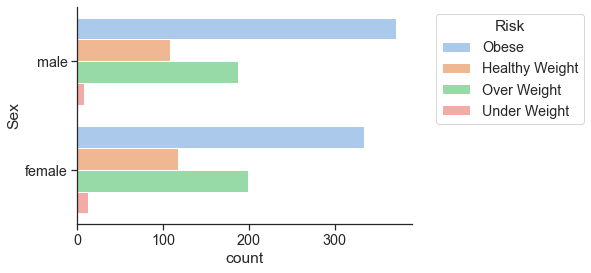

In [189]:
sns.countplot(data=df, y ="Sex", palette = 'pastel', hue = 'Risk')
plt.legend(labels=["Obese","Healthy Weight","Over Weight","Under Weight"], title="Risk", bbox_to_anchor=(1.05, 1), loc='upper left')

In [190]:
print('Total number of Medical Insurance Holders who has Obese:',np.sum([(df['Risk'] == 'Obese')]))
percent = (np.sum([(df['Risk'] == 'Obese')])/1337)*100
print('{:.2f}% of Medical Insurance Holders has Obese.'.format(percent))
print('Total male with Obese: ',np.sum([(df['Risk'] == 'Obese') & (df['Sex'] == 'male')]))
print('Total female with Obese: ',np.sum([(df['Risk'] == 'Obese') & (df['Sex'] == 'female')]))
print("\n")
print('Total number of Medical Insurance Holders who has Healthy Weight: ',np.sum([(df['Risk'] == 'Healthy Weight')]))
percent = (np.sum([(df['Risk'] == 'Healthy Weight')])/1337)*100
print('{:.2f}% of Medical Insurance Holders has Healthy Weight.'.format(percent))
print('Total male with Healthy Weight: ',np.sum([(df['Risk'] == 'Healthy Weight') & (df['Sex'] == 'male')]))
print('Total female with Healthy Weight: ',np.sum([(df['Risk'] == 'Healthy Weight') & (df['Sex'] == 'female')]))
print("\n")
print('Total number of Medical Insurance Holders who has Under Weight: ',np.sum([(df['Risk'] == 'Under Weight')]))
percent = (np.sum([(df['Risk'] == 'Under Weight')])/1337)*100
print('{:.2f}% of Medical Insurance Holders has Under Weight.'.format(percent))
print('Total male with Under Weight: ',np.sum([(df['Risk'] == 'Under Weight') & (df['Sex'] == 'male')]))
print('Total female with Under Weight: ',np.sum([(df['Risk'] == 'Under Weight') & (df['Sex'] == 'female')]))
print("\n")
print('Total number of Medical Insurance Holders who has Over Weight: ',np.sum([(df['Risk'] == 'Over Weight')]))
percent = (np.sum([(df['Risk'] == 'Over Weight')])/1337)*100
print('{:.2f}% of Medical Insurance Holders has Over Weight.'.format(percent))
print('Total male with Over Weight: ',np.sum([(df['Risk'] == 'Over Weight') & (df['Sex'] == 'male')]))
print('Total female with Over Weight: ',np.sum([(df['Risk'] == 'Over Weight') & (df['Sex'] == 'female')]))

Total number of Medical Insurance Holders who has Obese: 706
52.80% of Medical Insurance Holders has Obese.
Total male with Obese:  372
Total female with Obese:  334


Total number of Medical Insurance Holders who has Healthy Weight:  225
16.83% of Medical Insurance Holders has Healthy Weight.
Total male with Healthy Weight:  108
Total female with Healthy Weight:  117


Total number of Medical Insurance Holders who has Under Weight:  20
1.50% of Medical Insurance Holders has Under Weight.
Total male with Under Weight:  8
Total female with Under Weight:  12


Total number of Medical Insurance Holders who has Over Weight:  386
28.87% of Medical Insurance Holders has Over Weight.
Total male with Over Weight:  187
Total female with Over Weight:  199


#### 4.12 Finding if the Smoking habit has any impact on the Weight.

<AxesSubplot:xlabel='count', ylabel='Smoker'>

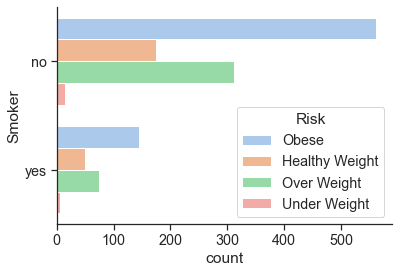

In [191]:
sns.countplot(data=df, y ="Smoker", palette = 'pastel', hue = 'Risk')

In [192]:
print('Total Smoker: ',np.sum([(df['Smoker'] == 'yes')]))
print('Total Non-Smoker: ',np.sum([(df['Smoker'] == 'no')]))
print("\n")
print('Total Smoker with Obese: ',np.sum([(df['Risk'] == 'Obese') & (df['Smoker'] == 'yes')]))
print('Total Non-Smoker with Obese: ',np.sum([(df['Risk'] == 'Obese') & (df['Smoker'] == 'no')]))
print("\n")
print('Total Smoker with Healthy Weight: ',np.sum([(df['Risk'] == 'Healthy Weight') & (df['Smoker'] == 'yes')]))
print('Total Non-Smoker with Healthy Weight: ',np.sum([(df['Risk'] == 'Healthy Weight') & (df['Smoker'] == 'no')]))
print("\n")
print('Total Smoker with Under Weight: ',np.sum([(df['Risk'] == 'Under Weight') & (df['Smoker'] == 'yes')]))
print('Total Non-Smoker with Under Weight: ',np.sum([(df['Risk'] == 'Under Weight') & (df['Smoker'] == 'no')]))
print("\n")
print('Total Smoker with Over Weight: ',np.sum([(df['Risk'] == 'Over Weight') & (df['Smoker'] == 'yes')]))
print('Total Non-Smoker with Over Weight: ',np.sum([(df['Risk'] == 'Over Weight') & (df['Smoker'] == 'no')]))

Total Smoker:  274
Total Non-Smoker:  1063


Total Smoker with Obese:  145
Total Non-Smoker with Obese:  561


Total Smoker with Healthy Weight:  50
Total Non-Smoker with Healthy Weight:  175


Total Smoker with Under Weight:  5
Total Non-Smoker with Under Weight:  15


Total Smoker with Over Weight:  74
Total Non-Smoker with Over Weight:  312


#### 4.13 Finding the relationship of Weight and Charges over male and female respectively.

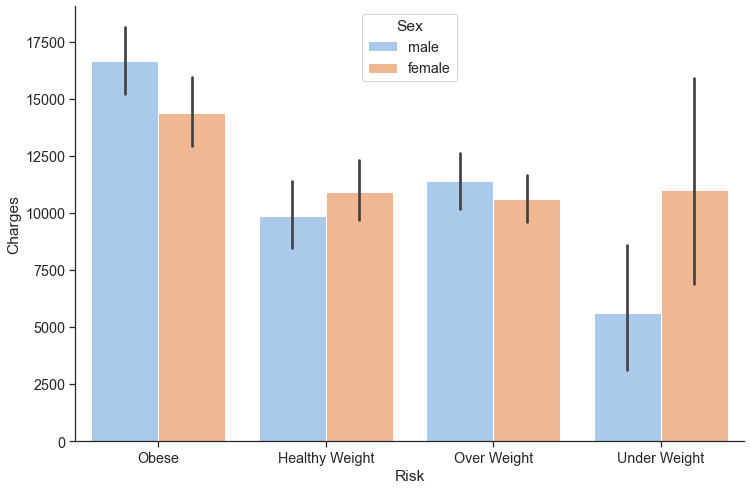

In [193]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Risk', y='Charges', hue='Sex', data=df, palette='pastel')

#### 4.14 Finding the relationship of Weight and Charges over Smoker and Non-Smoker respectively.

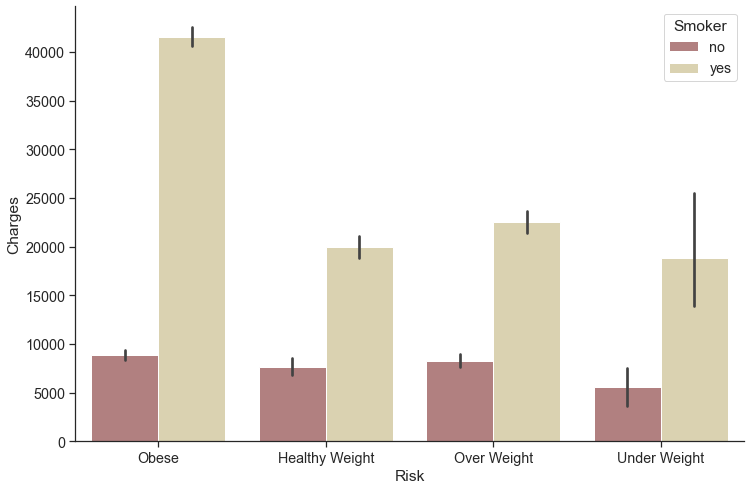

In [194]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Risk', y='Charges', hue='Smoker', data=df, palette='pink')

#### 4.15 The Distribution of Medical Insurance Holders by Weight Risk factors.

<AxesSubplot:xlabel='count', ylabel='Risk'>

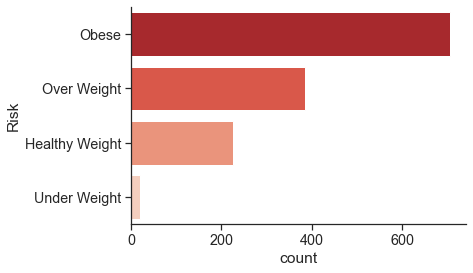

In [195]:
sns.countplot(data=df, y ="Risk", palette = 'Reds_r', order = df["Risk"].value_counts().index)

In [196]:
print('Obese: ',np.sum(df.Risk == 'Obese'))
print('Over Weight: ',np.sum(df.Risk == 'Over Weight'))
print('Healthy Weight: ',np.sum(df.Risk == 'Healthy Weight'))
print('Under Weight',np.sum(df.Risk == 'Under Weight'))

Obese:  706
Over Weight:  386
Healthy Weight:  225
Under Weight 20


In [197]:
print('Total Female with Obese: ',np.sum([(df['Risk'] == 'Obese') & (df['Sex'] == 'female')]))
print('Total Male with Obese: ',np.sum([(df['Risk'] == 'Obese') & (df['Sex'] == 'male')]))

Total Female with Obese:  334
Total Male with Obese:  372


#### 4.16 How the Weight Risk factors varies for male and female.

<AxesSubplot:xlabel='count', ylabel='Risk'>

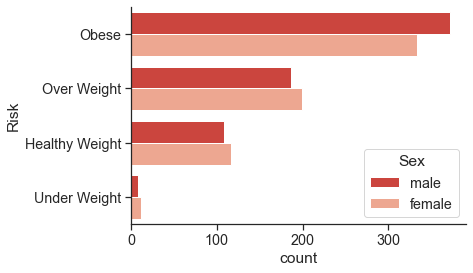

In [198]:
sns.countplot(data=df, y ="Risk", hue = 'Sex', palette = 'Reds_r', order = df["Risk"].value_counts().index)

In [199]:
print('Total Smoker with Obese: ',np.sum([(df['Risk'] == 'Obese') & (df['Smoker'] == 'yes')]))
print('Total Non-Smoker with Obese: ',np.sum([(df['Risk'] == 'Obese') & (df['Smoker'] == 'no')]))

Total Smoker with Obese:  145
Total Non-Smoker with Obese:  561


## 5. Discussions on the research questions based on the Data Analysis, Visualizations and Initial Observations from EDA.

#### RQ1: How smoking habit impacts the medical cost?

 We have already seen from the Pandas_Profiling that the insurance charge is highly correlated with smoking habit. The plot in 4.1 indicates that the maximum number of Smokers usually have BMI around the range 30-40(BMI>30 indicates Obese) and they need to pay high insurance charge usually around 35000 to 50000 while almost all the Non-Smokers pay around 1121 to 15000. The plot in 4.3 demonstrates the distribution of charges for smokers vs. non-smoker and it clearly shows the amount of insurance charge the smokers need to pay is very high comparing to non-smokers.

Pandas_profiling has already shown a high correlation between age and charges as expected. According to the plot 4.2, as the age increases, the medical insurance cost also increases at a very slow rate. But the cost mainly varies based on the smoking habit.

That indicates Smoking strongly effects body weight resulting into obese and thus a very high medical cost beyond gender and age.

#### RQ2: Is there any relationship between having children and being healthy?

As expected the insurance cost increases as the number of children increases. But very surprisingly, 4.4 indicates that the parent of 5 children pays the lowest cost. This might be due to small amount (1.3%) of data that represents parent with 5 children.

I tried to find if there is any relationship between having children and being healthy through the section 4.5. The plot in 4.5 shows that the most people who does not have any children suffers from Obesity in most cases. Further analysis found that, the total number of Insurance Holders who has Obese is 706 of which 300 persons have no children. Other 406 persons have at least one child to at most 5 children. Also, there are 225 persons with healthy weight; 128 persons have children while 97 persons do not have any children.

Although the number of children has no significant correlation with insurance cost, but it is obviously related to being healthy. This reason behind this might be, the children keep the parent busy both physically and mentally. Also, the children are a source of joy which keeps the heart healthy. 

Whatever, according to the analysis on the given dataset, having children is found to be a good indicator for being healthy.

#### RQ3: Does the gender has any role in being smoker?
 
4.6 indicates that there are 1063 non-smokers and 274 smokers among the sample population of 1337(after removing the one duplicate row). Among 274 smokers, 159 are male and 115 are female. I do not think the difference between the number of male smoker and female smoker is very significant. So, Gender does not have any role a person being smoker.

#### RQ4: Which region charges the most?

The section 4.7 indicates that the South-East region charges the most while all the other regions charge almost similar. The maximum charge of South-East region is 63770.43 USD, North-East is 58571.08 USD, South-West is 52590.83 USD and North-West is 60021.40 USD.


#### RQ5: What is the relationship among charges, region, and gender?

4.8 indicates the South-East region charges the most as indicated in 4.7. In each region there are slight difference between charges for male and female except the North-West region. Usually costs for female are comparatively lower than male, but in North-West region it is same for both male and female.

#### RQ6: Which region has the most smoker?

4.9 shows the relationship among charges, region, and smoking habit. It is clear from 4.9 that, South-East region has the most smoker which is 91 while for North-East region, it is 67 and for both South-West and North-West it is 58.

#### RQ7: Which region has the maximum number of insurance holders?

According to 4.10, South-East region has the maximum number of insurance holders which is 364. The North-East, South-West and North-West region have almost the same number; 324, 325 and 324 respectively.

#### RQ8: Is there any impact of gender on the weight?

4.11 and 4.16 clearly demonstrate that the gender role has nothing for a person being over weighted or obese, though Females are healthier than males by a very small difference.

#### RQ9: Are healthy weight and insurance cost related to gender or smoking habit?

According to 4.13, the people with obesity pay the most insurance cost as expected. Females with obesity and overweight pay comparatively lower than males. But females with healthy weight pay much than healthy males. The underweight males pay half as the underweight females pay. So, the relationship among weight, insurance cost and gender is complex.

4.14 clearly indicates that the smokers are more likely to be obese and hence pay the most charges which is significantly huge than the other weight categories.

#### RQ10: What are the numbers of persons with different weight status?
From section 4.15, among 1337 cases, 706(52.81%) people are obese, 386(28.87%) are Overweight, 225(16.83%) are Healthy, and 20(1.49%) are Underweight. 334 females and 372 males have obesity.








